In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import math


In [3]:
%matplotlib inline

In [4]:
summary = pd.read_csv("atusdata/atussum_2013.dat")
summary.info()

summary.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
resp = pd.read_csv("atusdata/atusresp_2013.dat")
resp.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20130101130004,1,2013,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
1,20130101130112,1,2013,1,-1,-1,-1,-1,-1,2,...,0,0,0,0,0,0,-1,0,0,-1
2,20130101130123,1,2013,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,0,-1,-1,-1,-1,-1
3,20130101130611,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20130101130616,1,2013,1,-1,-1,-1,-1,-1,2,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1


In [6]:
resp = resp.rename(columns={
        'TUCASEID': 'ID',
        'TUYEAR': 'YEAR',
        'TUMONTH': 'MONTH'
    })

In [7]:
summary = summary.rename(columns={"t010101": "SLEEPING", 'tucaseid': 'ID', 
                                  'TEAGE': 'AGE', 't080601': 'BUYING_REALESTATE',
                                 "t110101": "EATING_DRINKING", 't130116': 'HIKING',
                                'TESEX': "GENDER", 't120307': 'Playing_Games',
                                'TUFINLWGT': 'WEIGHT', 't120303': 'MINUTES'
                                 })
summary['Weighted_Minutes'] = summary.WEIGHT * summary.MINUTES

summary =  summary.rename(columns={'t120301': 'THINKING', 't120302': 'TOBBACO_OR_DRUGS'})
summary = summary.replace({'GENDER': {1: 'Male', 2: 'Female'}})


In [41]:
df = summary
df = df[df.AGE >=18]
df = df[df.MINUTES > 0]
df = df[df.EATING_DRINKING > 0]
df = df[['ID', 'THINKING', 'EATING_DRINKING', 'SLEEPING', 'Weighted_Minutes', 'WEIGHT']]
df.index = df.ID


In [42]:
nf = df[['THINKING', 'EATING_DRINKING', 'SLEEPING', 'Weighted_Minutes', 'WEIGHT']]
nf = nf.sort_index()
nf = nf[nf.EATING_DRINKING > 0]
nf = nf[nf.THINKING > 0]
nf = nf[nf.SLEEPING > 0]


nf.head()

,THINKING,EATING_DRINKING,SLEEPING,Weighted_Minutes,WEIGHT
ID,,,,,
20130101130658,163,35,290,1.383807e+09,5671341.270490
20130101130740,30,30,210,1.284359e+09,4538371.462244
20130101130871,30,30,450,4.818951e+08,6884215.057542
20130101131096,190,50,720,1.209388e+09,3359410.785590
20130101131112,235,30,150,1.877658e+09,7823574.493908


In [43]:
frame_one = nf
frame_two = resp

In [44]:

frame_two = frame_two[['ID', 'YEAR', 'MONTH']]

frame_two.index = frame_two.ID
date_frame = frame_two[['YEAR', 'MONTH']]
mer = pd.merge(nf, date_frame, left_index=True, right_index=True)
mer.head()

,THINKING,EATING_DRINKING,SLEEPING,Weighted_Minutes,WEIGHT,YEAR,MONTH
ID,,,,,,,
20130101130658,163,35,290,1.383807e+09,5671341.270490,2013,1
20130101130740,30,30,210,1.284359e+09,4538371.462244,2013,1
20130101130871,30,30,450,4.818951e+08,6884215.057542,2013,1
20130101131096,190,50,720,1.209388e+09,3359410.785590,2013,1
20130101131112,235,30,150,1.877658e+09,7823574.493908,2013,1


In [48]:
kf = summary
kf = kf[kf.AGE < 18]
kf = kf[kf.MINUTES > 0]
kf = kf[kf.EATING_DRINKING > 0]
kf = kf[['ID', 'THINKING', 'EATING_DRINKING', 'SLEEPING', 'Weighted_Minutes', 'WEIGHT']]
kf.index = kf.ID


In [49]:
nkf = kf[['THINKING', 'EATING_DRINKING', 'SLEEPING', 'Weighted_Minutes', 'WEIGHT']]
nkf = nkf.sort_index()
nkf = nkf[nkf.EATING_DRINKING > 0]
nkf = nkf[nkf.THINKING > 0]
nkf = nkf[nkf.SLEEPING > 0]




In [50]:
frame_uno = nkf
frame_do = resp
frame_do = frame_do[['ID', 'YEAR', 'MONTH']]

frame_do.index = frame_do.ID
dat_frame = frame_do[['YEAR', 'MONTH']]
mer_two = pd.merge(nkf, dat_frame, left_index=True, right_index=True)
mer_two.head()

,THINKING,EATING_DRINKING,SLEEPING,Weighted_Minutes,WEIGHT,YEAR,MONTH
ID,,,,,,,
20130101131579,165,45,450,2.902550e+09,23220400.569550,2013,1
20130112122463,60,70,483,4.050303e+08,13501009.381268,2013,1
20130201130903,198,20,360,5.743618e+09,25527192.574877,2013,2
20130201131012,112,45,600,2.930741e+09,6994607.640106,2013,2
20130201131263,20,45,457,5.420518e+08,7227357.087550,2013,2


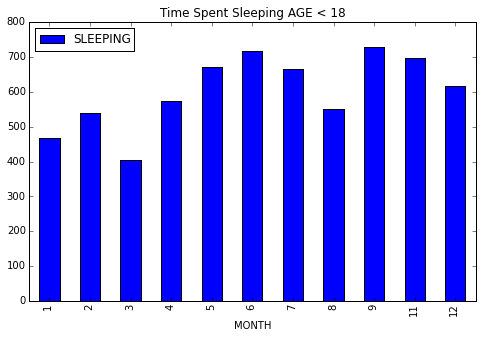

In [58]:
sleep = mer_two[['SLEEPING', 'MONTH']]
sleep.groupby(['MONTH']).mean().plot(kind='bar', figsize=(8,5), title='Time Spent Sleeping AGE < 18')


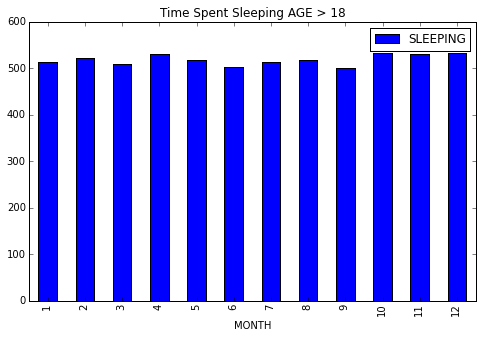

In [63]:
sleep = mer[['SLEEPING', 'MONTH']]
sleep.groupby(['MONTH']).mean().plot(kind='bar', figsize=(8,5), title='Time Spent Sleeping AGE > 18')


##The time spent sleeping graphs show that persons older than 18 report a normalized sleep pattern throughout the year, and persons under 18 seem to report different amounts of sleep every month.

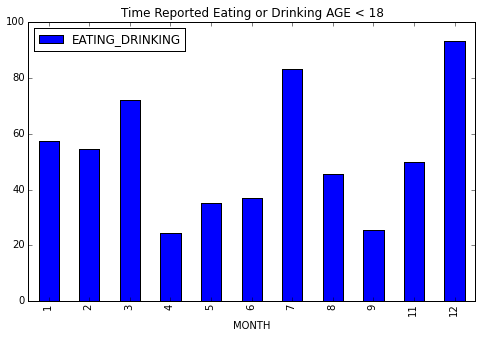

In [65]:
eat = mer_two[['EATING_DRINKING', 'MONTH']]
eat.groupby(['MONTH']).mean().plot(kind='bar', figsize=(8,5), title='Time Reported Eating or Drinking AGE < 18')


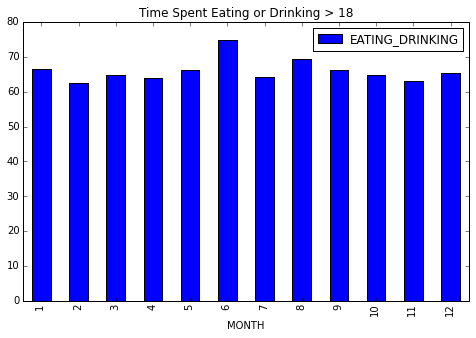

In [64]:
eat = mer[['EATING_DRINKING', 'MONTH']]
eat.groupby(['MONTH']).mean().plot(kind='bar', figsize=(8,5), title='Time Spent Eating or Drinking > 18')


##Reported time spent eating and drinking is more normalized for persons over 18 than persons under 18.

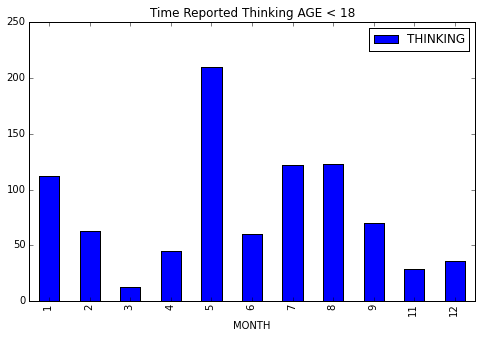

In [61]:
thinking = mer_two[['THINKING', 'MONTH']]
thinking.groupby(['MONTH']).mean().plot(kind='bar', figsize=(8,5), title='Time Reported Thinking AGE < 18')


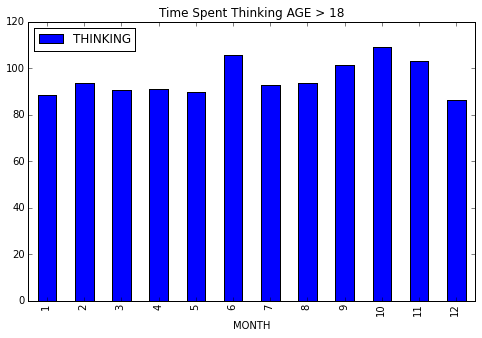

In [62]:
thinking = mer[['THINKING', 'MONTH']]
thinking.groupby(['MONTH']).mean().plot(kind='bar', figsize=(8,5), title='Time Spent Thinking AGE > 18')


##By looking at the time spent thinking graphs you can see that people over 18 reported spending a lot more time thinking than people under 18